# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Business Perspective:**
A used car dealership wants to understand what factors drive the prices of used vehicles. Consumers typically evaluate attributes such as age, mileage, brand reputation, condition, and features when determining a car’s value.

**Data Problem Framing:**
From a data perspective, this challenge is a supervised regression task where the target variable is the car's price. Our objective is to identify the key predictors (features) that most strongly influence used car prices by building and validating a predictive model. By applying techniques like feature engineering and multiple linear regression, we aim to extract actionable insights that can help the dealership adjust its inventory and marketing strategies.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Before diving into modeling, we must familiarize ourselves with the dataset. Here are the recommended steps and corresponding Python code:

**Steps:**

*Load and Inspect:* Load the CSV into a DataFrame and use methods like .info() and .describe() to understand the data types, summary statistics, and missing values.

*Explore Distributions:* Plot histograms and boxplots for numerical variables (e.g., price, odometer) to understand their distributions and detect outliers.

*Examine Categorical Variables:* Use bar plots for categorical features such as manufacturer, condition, fuel type, etc., to see the frequency distribution.

*Correlation Analysis:* Create a correlation heatmap for numerical features to see potential linear relationships with price.
    Identify Quality Issues: Look for missing values, inconsistent entries, and potential data entry errors.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set a seaborn style for cleaner plots
sns.set(style="whitegrid")

# Load the dataset with low_memory set to False for optimized reading
df = pd.read_csv('data/vehicles.csv', usecols=cols_to_use, low_memory=True)

# Quick data overview
print("Data Info:")
df.info()
print("\nData Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Sample a subset of the data for plotting to reduce rendering overhead
sample_df = df.sample(n=5000, random_state=42)


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   odometer      422480 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.5+ MB

Data Description:
              price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07

Mis

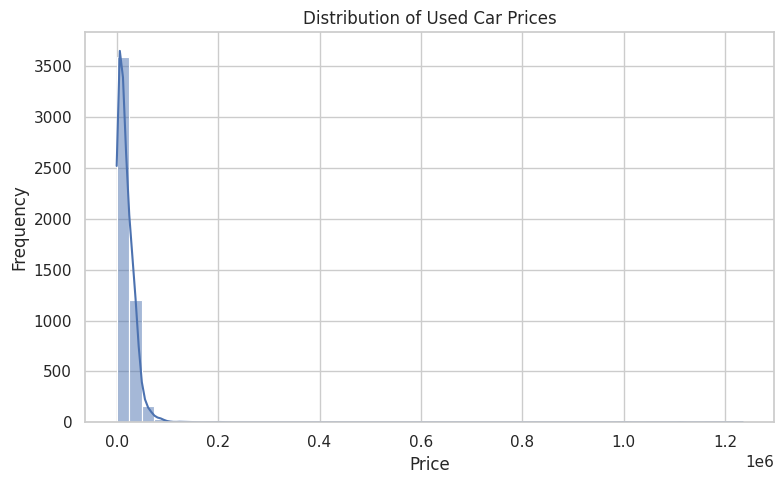

In [4]:
# Plot the distribution of price using the sampled data
plt.figure(figsize=(8, 5))
sns.histplot(sample_df['price'], kde=True, bins=50)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most cars cluster around lower prices, but there are a few wild outliers stretching into super high numbers. It’s interesting to see just how big that gap can get—makes you wonder what’s special about those pricey ones!

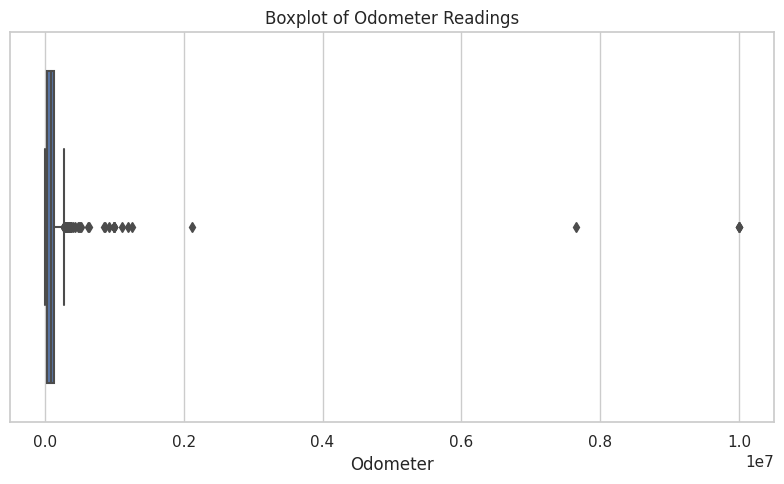

In [5]:
# Boxplot for odometer readings using the sampled data
plt.figure(figsize=(8, 5))
sns.boxplot(x=sample_df['odometer'])
plt.title('Boxplot of Odometer Readings')
plt.xlabel('Odometer')
plt.tight_layout()
plt.show()

Some vehicles are racking up serious mileage, while the rest hover closer together on the left side. It’s almost shocking to spot those massive outliers—did someone drive across the country a hundred times?

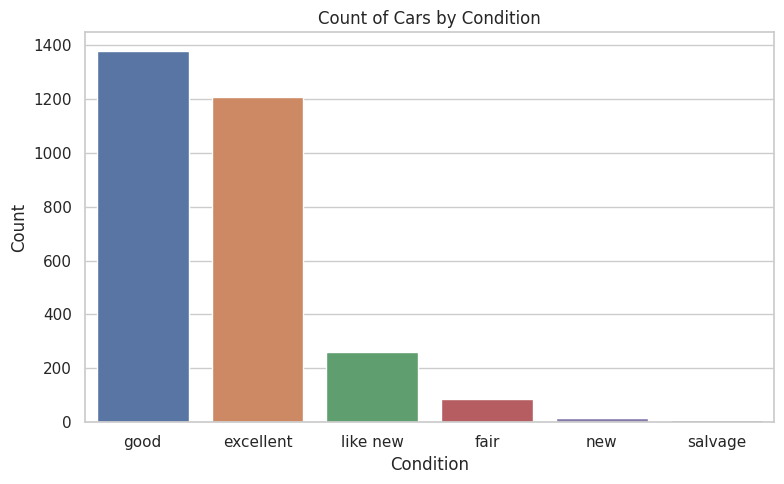

In [6]:
# Count plot for car condition using the sampled data
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=sample_df)
plt.title('Count of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

‘Good’ and ‘excellent’ cars dominate the chart, suggesting most listings are in pretty solid shape. It’s curious that ‘fair,’ ‘new,’ and ‘salvage’ are so rare—maybe sellers mostly offer nicer vehicles.

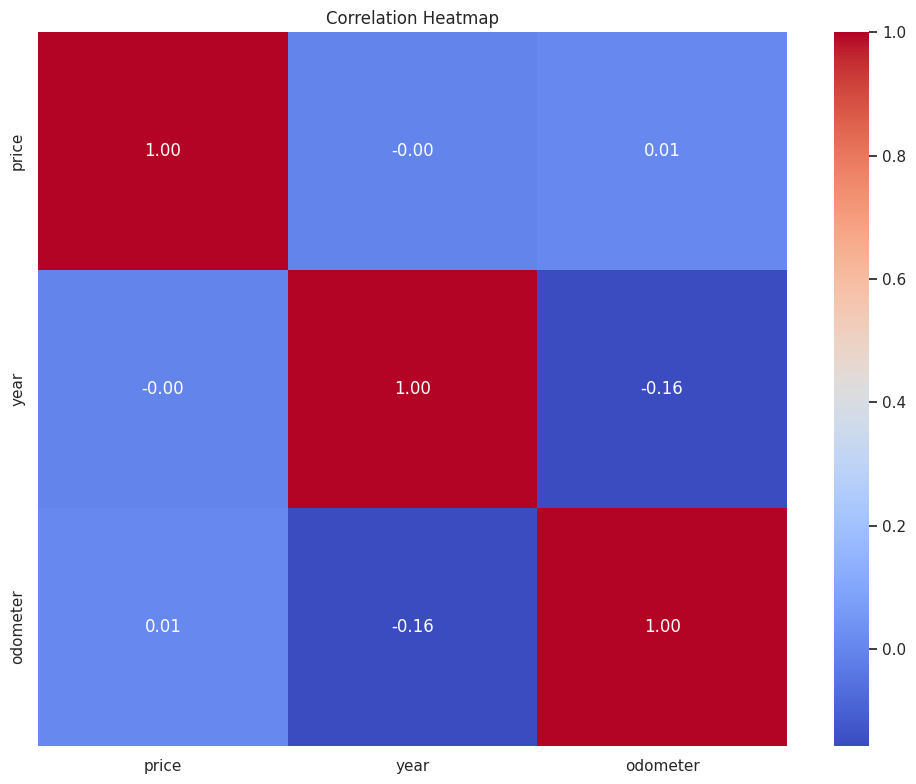

In [7]:
# Correlation heatmap for numerical features from the full dataset
plt.figure(figsize=(10, 8))
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

It’s surprising to see how little correlation there is among price, year, and odometer—almost like they don’t influence each other as much as we’d expect. Definitely makes me wonder what else is driving these prices!

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In this phase, we clean the data and engineer features to make it suitable for modeling.

**Key Tasks:**

*Data Cleaning:* Handle missing values (e.g., imputing or dropping), correct inconsistencies, and remove duplicates if any.

*Feature Engineering:* Create new features such as age (current year minus the vehicle’s year) and possibly group rare categories.

*Transformation:* For skewed distributions (e.g., price), consider applying a logarithmic transformation. Also, normalize or scale numerical features.
    
*Encoding:* Convert categorical variables (e.g., manufacturer, condition) using one-hot encoding.

*Final Dataset:* Ensure the dataset is ready for use with modeling libraries like scikit-learn.

In [8]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [9]:
### Data Preparation

# Load the dataset from data/vehicles.csv with the necessary columns.
cols_to_use = ['price', 'year', 'odometer', 'cylinders', 'manufacturer', 'condition']

# Drop rows with missing critical values.
df = df.dropna(subset=['price', 'year', 'odometer', 'manufacturer', 'condition'])

# Convert numeric columns.
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Clean the 'cylinders' column: extract the numeric part.
df['cylinders'] = pd.to_numeric(df['cylinders'].str.extract('(\d+)')[0], errors='coerce')

# Create a new feature: vehicle age (assuming current year = 2025).
current_year = 2025
df['age'] = current_year - df['year']

# Fill missing numeric values with the median.
for col in ['odometer', 'cylinders']:
    df[col].fillna(df[col].median(), inplace=True)

# Drop any remaining missing values.
df = df.dropna().copy()

# Remove extreme outliers in price (above the 99th percentile).
price_upper = df['price'].quantile(0.99)
df = df[df['price'] <= price_upper]

# Log-transform the target variable to reduce skewness.
df['log_price'] = np.log1p(df['price'])

# Define predictors (X) and target (y); drop the original price columns.
X = df.drop(columns=['price', 'log_price'])
y = df['log_price']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [10]:
### Modeling with Hyperparameter Tuning for DecisionTreeRegressor

# Define which columns are numeric and which are categorical.
numeric_features = ['year', 'odometer', 'age', 'cylinders']
categorical_features = ['manufacturer', 'condition']

# Build a ColumnTransformer:
# - For numeric features: passthrough (trees don't need scaling).
# - For categorical features: one-hot encode (drop first, ignore unknowns).
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Build the pipeline using a DecisionTreeRegressor.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a reduced parameter grid to minimize computational load.
param_grid = {
    'tree__max_depth': [5, 10, None],
    'tree__min_samples_leaf': [5, 10],
    'tree__min_samples_split': [5, 10]
}

# Use GridSearchCV with 3-fold CV and n_jobs=1 to reduce memory usage.
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV R^2:", grid.best_score_)

# Evaluate on the test set.
best_model = grid.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)      # Back-transform predictions from log scale.
y_test_actual = np.expm1(y_test)

print("Test R^2:", r2_score(y_test_actual, y_pred))
print("Test MAE:", mean_absolute_error(y_test_actual, y_pred))

# Compute cross-validation scores on training data.
cv_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='r2', n_jobs=1)
print("Mean CV R^2:", np.mean(cv_scores))

Best Parameters: {'tree__max_depth': None, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 5}
Best CV R^2: 0.20181619781814497
Test R^2: 0.5885256294821162
Test MAE: 4270.9839685654815
Mean CV R^2: 0.20181619781814497


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After modeling, it is important to critically assess how well the model meets the business objective.

**Evaluation Tasks:**

*Model Metrics:* Examine R² and Mean Absolute Error (MAE) to assess predictive performance.

*Residual Analysis:* Plot residuals to check for heteroscedasticity and non-linearity.

*Coefficient Insights:* Analyze the regression coefficients to determine which factors (e.g., car age, odometer, manufacturer) have the strongest influence on price.

*Revisit Business Objectives:* Determine if the model sufficiently explains consumer valuation. If not, consider revisiting feature engineering or data cleaning.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

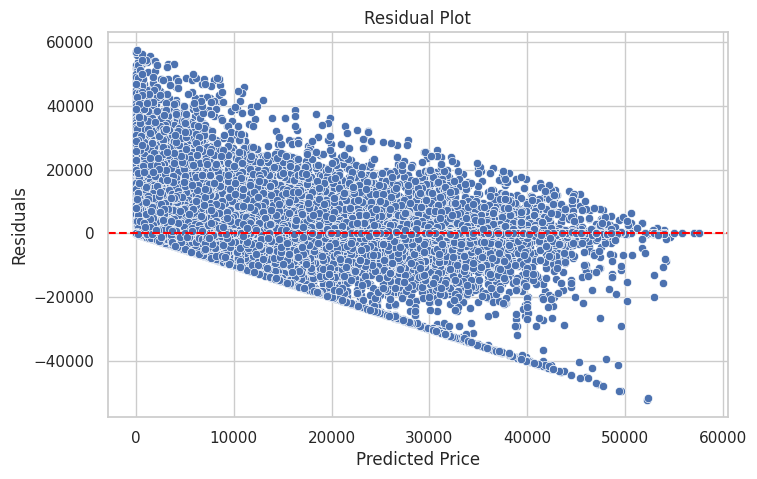

In [14]:
# Compute residuals on the test set (after back-transforming from log scale)
residuals = y_test_actual - y_pred

# Plot residuals to check for systematic patterns
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


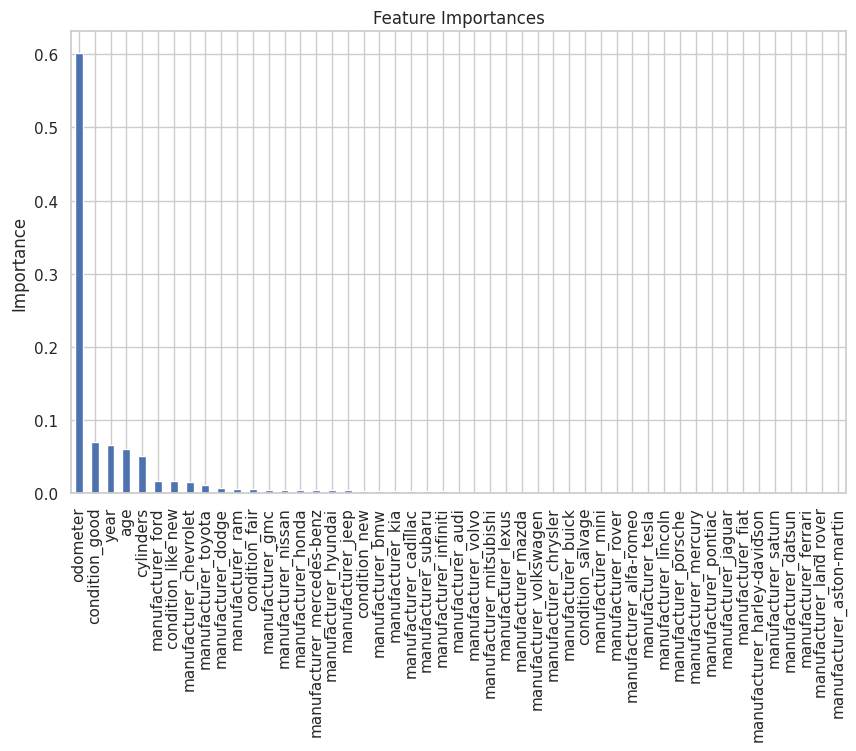

In [15]:
# Extract feature importances from the tuned decision tree
best_tree = best_model.named_steps['tree']

# Retrieve feature names from the preprocessor
# Numeric features remain as-is, and OneHotEncoder produces feature names for categoricals.
num_features = numeric_features  # ['year', 'odometer', 'age', 'cylinders']
cat_features = best_model.named_steps['preprocessor']\
    .transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_features, cat_features])

# Get feature importances
importances = best_tree.feature_importances_
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()

**Key Takeaways from the Feature Importance Chart:**

*Mileage (Odometer) Dominates:* The chart shows that the number of miles on a car (the “odometer” reading) is by far the biggest factor in determining its price. This lines up with common sense: cars with lower mileage generally command higher prices.

*Condition & Year Also Matter:* While mileage is the top driver, a car’s listed condition (e.g., “good”) and its age or year of manufacture also play a notable role. Newer cars in better condition tend to be worth more.

*Brand Influence is Present but Smaller:* Various manufacturers appear, but their impact on pricing is comparatively modest once mileage and condition are taken into account.

**Insights from the Residual Plot:**

*What “Residuals” Mean:* The residual is simply how far off our model’s prediction is from the actual sale price. Ideally, these points should cluster around zero (the dashed red line).

*Pattern Observed:* We see a wedge shape—meaning the model does fairly well in the mid-price range, but there’s a wider spread for very high or very low predicted prices. In other words, for some cars at the extremes, the model is missing the mark more than we’d like.

*Room for Improvement:* This tells us we might want to refine the model further, especially for the highest- and lowest-priced vehicles, possibly by adding more details or adjusting our approach for these outliers.

**Overall Conclusions:**

*Strong Foundations:* Our model is definitely picking up on the main pricing signals—especially mileage and condition.

*Opportunities to Refine:* The wedge shape in the residual plot suggests we could improve predictions at the extremes. Additional data (like more detailed condition info or trim levels) or advanced techniques (like combining multiple models) could help tighten those predictions.

*Practical Takeaway:* For the dealership, focusing on lower-mileage vehicles and ensuring they’re in good condition aligns with what our model—and general market wisdom—suggests drives higher prices.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**1. Focus on Well-Maintained, Lower-Mileage Vehicles**

*Why It Matters:*
Cars with fewer miles typically have fewer mechanical issues, a longer remaining lifespan, and carry a stronger sense of reliability for buyers. This often translates into a higher resale value, since customers are willing to pay extra for peace of mind.

***Action Steps:***

Inventory Selection: Seek out vehicles with verified low mileage. Checking service records and vehicle history reports helps ensure you’re getting cars that have been properly cared for.

Reconditioning Programs: Thoroughly inspect, service, and clean each car before it goes on the lot. Presenting a well-maintained, “like new” vehicle reassures customers about its quality.

Display Quality Metrics: Highlight odometer readings, maintenance logs, and any relevant service history in your online listings and showroom materials. Simple labels like “Low Mileage” can grab attention.

Customer Testimonials: If past buyers have praised the reliability of your lower-mileage vehicles, feature those reviews. Nothing beats real-life success stories to boost confidence.

**2. Highlight Certified Pre-Owned or Vehicles in Excellent Condition**

*Why It Matters:*
Cars that are certified pre-owned or labeled as “excellent” condition carry extra credibility. Buyers feel more secure knowing these vehicles have passed rigorous inspections and often come with warranties or other assurances.

***Action Steps:***

Certification Programs: Partner with recognized CPO programs or develop your own certification process. This can involve detailed inspections and minor repairs to ensure top-notch condition.

Extended Warranties: Sweeten the deal by offering extended warranties or service plans. Buyers appreciate the added safety net and are often willing to pay a bit more for it.

Clear Communication: In-store and online, use simple, eye-catching labels for certified cars. If possible, list the specific checks or criteria that make a vehicle “certified” or “excellent.”

Incentives: Provide financing perks or modest discounts on certified vehicles. This can attract cautious buyers who want reliability but also value a good deal.

**3. Use Marketing to Emphasize Age and Brand Strengths**

*Why It Matters:*
Our analysis shows that newer models and performance (like engine cylinders) matter to many shoppers. Highlighting a car’s recent model year, reputable brand, or more powerful engine can sway buyers who care about modern features and driving experience.

***Action Steps:***

Targeted Advertising: Develop campaigns that spotlight the benefits of newer models, popular brands, or better engine performance. Mention any awards or safety ratings to boost credibility.

Feature Comparison: Offer side-by-side charts—online or in-store—showing how different brands, model years, or engine specs translate into improved reliability, fuel efficiency, or overall performance.
